In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

# Training Data

In [86]:
Titanic_train = pd.read_csv("train.csv")
Titanic_train.set_index("PassengerId",inplace=True)
Titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Test Data

In [87]:
Titanic_test = pd.read_csv("test.csv")
Titanic_test.set_index("PassengerId",inplace=True)
Titanic_test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Merging Both DataSets

In [88]:
Titanic_Data = pd.concat([Titanic_train,Titanic_test])
Titanic_Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Set's Overall Infomation

In [89]:
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


# Shape of DataSet

In [90]:
Titanic_Data.shape

(1309, 11)

# All Unique Values

In [91]:
Titanic_Data.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin        186
Embarked       3
dtype: int64

# Checking for Null Values

In [92]:
Titanic_Data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

# Combing SibSp and Parch column into Family Column

In [93]:
Titanic_Data["Family"] = Titanic_Data["SibSp"] + Titanic_Data["Parch"]

# Dropping Cabin column and rearranging Columns 

In [94]:
Titanic_Data = Titanic_Data.drop(columns="Cabin")
Titanic_Data = Titanic_Data[["Ticket","Name","Age","Sex","Pclass","Family","Fare","Embarked","Survived"]]
Titanic_Data.head()

,Ticket,Name,Age,Sex,Pclass,Family,Fare,Embarked,Survived
PassengerId,,,,,,,,,
1,A/5 21171,"Braund, Mr. Owen Harris",22.0,male,3,1,7.2500,S,0.0
2,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1,71.2833,C,1.0
3,STON/O2. 3101282,"Heikkinen, Miss. Laina",26.0,female,3,0,7.9250,S,1.0
4,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1,53.1000,S,1.0
5,373450,"Allen, Mr. William Henry",35.0,male,3,0,8.0500,S,0.0


# Plotting Values

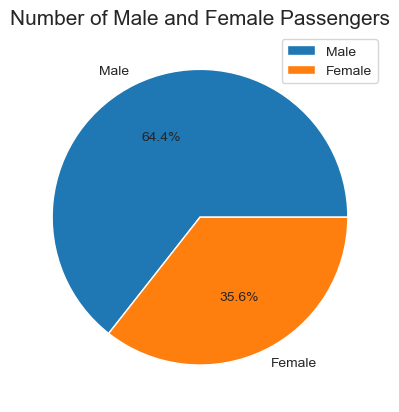

In [95]:
labels = "Male","Female"
fig , ax = plt.subplots()
ax.pie(Titanic_Data.Sex.value_counts(),labels = labels ,autopct='%1.1f%%')
plt.title('Number of Male and Female Passengers',fontsize=15)
plt.legend(["Male","Female"])
plt.show()

# Dropping Rows with Null Age Values

In [96]:
Titanic_Data.dropna(subset=["Age"],inplace=True)
Titanic_Data.tail()

,Ticket,Name,Age,Sex,Pclass,Family,Fare,Embarked,Survived
PassengerId,,,,,,,,,
1301,SOTON/O.Q. 3101315,"Peacock, Miss. Treasteall",3.0,female,3,2,13.775,S,NaN
1303,19928,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37.0,female,1,1,90.000,Q,NaN
1304,347086,"Henriksson, Miss. Jenny Lovisa",28.0,female,3,0,7.775,S,NaN
1306,PC 17758,"Oliva y Ocana, Dona. Fermina",39.0,female,1,0,108.900,C,NaN
1307,SOTON/O.Q. 3101262,"Saether, Mr. Simon Sivertsen",38.5,male,3,0,7.250,S,NaN


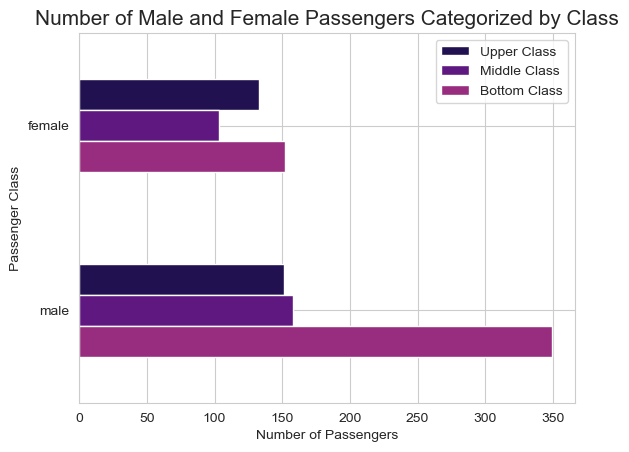

In [97]:
Titanic_Data.groupby(["Sex","Pclass"])["Sex"].count().unstack().plot.barh(color=sns.color_palette("magma"))

sns.set_style("whitegrid")
plt.title('Number of Male and Female Passengers Categorized by Class',fontsize=15)
plt.xlabel('Number of Passengers')
plt.ylabel('Passenger Class')
plt.legend(["Upper Class","Middle Class","Bottom Class"])
plt.gca().invert_yaxis()

plt.show()

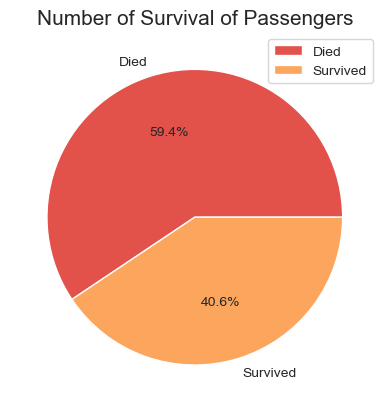

In [98]:
Survived_Notna = Titanic_Data[Titanic_Data.Survived.notna()].Survived.value_counts()

labels = "Died","Survived"
fig , ax = plt.subplots()
ax.pie(Survived_Notna,labels=labels,autopct='%1.1f%%',colors=sns.color_palette("Spectral"))
plt.title('Number of Survival of Passengers',fontsize=15)
ax.legend(["Died","Survived"])

plt.show()

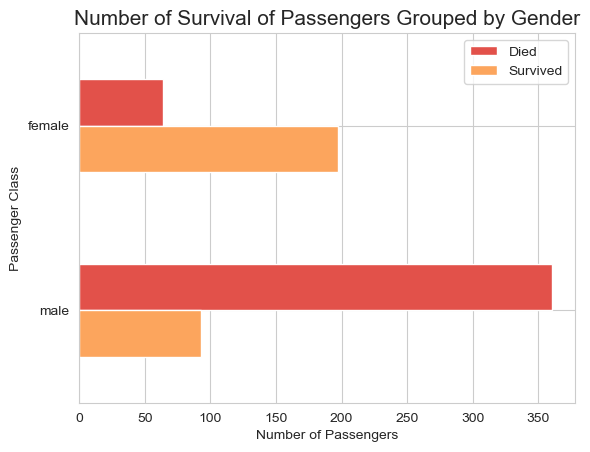

In [99]:
Titanic_Data.groupby(["Sex","Survived"])["Sex"].count().unstack().plot.barh(color=sns.color_palette("Spectral"))

sns.set_style("whitegrid")
plt.title('Number of Survival of Passengers Grouped by Gender',fontsize=15)
plt.xlabel('Number of Passengers')
plt.ylabel('Passenger Class')
plt.legend(["Died","Survived"])
plt.gca().invert_yaxis()

plt.show()